<a href="https://colab.research.google.com/github/Intanpratiwiiii/Intann/blob/main/Data_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
dataset = pd.read_csv('Netflix Inc. (NFLX) Stock Price 2002-2025.csv')
dataset.head()
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
x = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.20, random_state= 0) # Changed X to x and Y to y

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(random_state = 0)
model_logistic.fit(X_train, Y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

y_pred_dt = classifier.predict_proba(X_test)  # Changed dt to classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators = 100)
rfr.fit(X_train, Y_train)

y_pred_rfr = rfr.predict_proba(X_test)

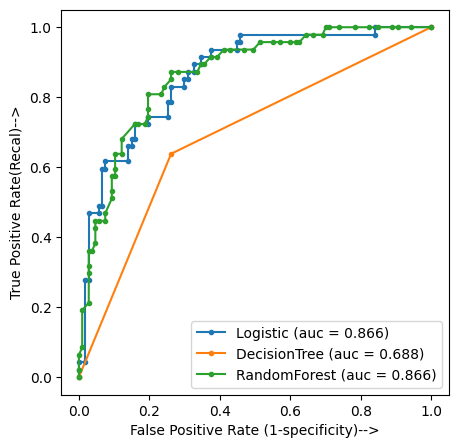

In [34]:
from sklearn.metrics import roc_curve, auc


logistic_fpr, logistic_tpr, threshold = roc_curve(Y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

dt_fpr, dt_tpr, thershold = roc_curve(Y_test, y_pred_dt[:,1:2])
auc_dt = auc(dt_fpr, dt_tpr)

rfr_fpr, rfr_tpr, thershold = roc_curve(Y_test, y_pred_rfr[:,1:2])
auc_rfr = auc(rfr_fpr, rfr_tpr)

plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DecisionTree (auc = %0.3f)' % auc_dt)
plt.plot(rfr_fpr, rfr_tpr, marker='.', label='RandomForest (auc = %0.3f)' % auc_rfr)

plt.xlabel('False Positive Rate (1-specificity)-->')
plt.ylabel('True Positive Rate(Recal)-->')



plt.legend()

plt.show()

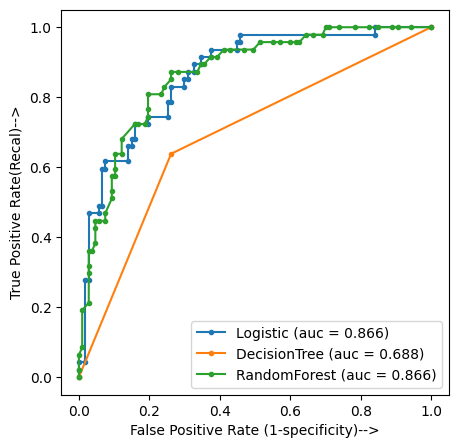

In [35]:
from sklearn.metrics import roc_curve, auc


logistic_fpr, logistic_tpr, threshold = roc_curve(Y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

dt_fpr, dt_tpr, thershold = roc_curve(Y_test, y_pred_dt[:,1:2])
auc_dt = auc(dt_fpr, dt_tpr)

rfr_fpr, rfr_tpr, thershold = roc_curve(Y_test, y_pred_rfr[:,1:2])
auc_rfr = auc(rfr_fpr, rfr_tpr)

plt.figure(figsize=(5, 5), dpi=100)

# Changed 'maker' to 'marker'
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
# Changed 'maker' to 'marker'
plt.plot(dt_fpr, dt_tpr, marker='.', label='DecisionTree (auc = %0.3f)' % auc_dt)
# Changed 'maker' to 'marker'
plt.plot(rfr_fpr, rfr_tpr, marker='.', label='RandomForest (auc = %0.3f)' % auc_rfr)

plt.xlabel('False Positive Rate (1-specificity)-->')
plt.ylabel('True Positive Rate(Recal)-->')



plt.legend()

plt.show()